Fake news binary classification

DATA PREPARATION

In [4]:
##Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans

In [5]:
##Reading the dataset as a dataframe
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
##coverting multiclass labels (0-5) to binary labels
## 0 for fake news (0,1,2) and 1 for real news (3,4,5)
df['binary_label'] = df['label'].apply(lambda x: 0 if x in [0,1,2] else 1)

In [6]:
##TF-IDF Vectorization with n-gramming
vectorizer = TfidfVectorizer(stop_words = 'english', max_features= 5000, ngram_range= (1,3))
X= vectorizer.fit_transform(df['statement'])
y= df['binary_label']

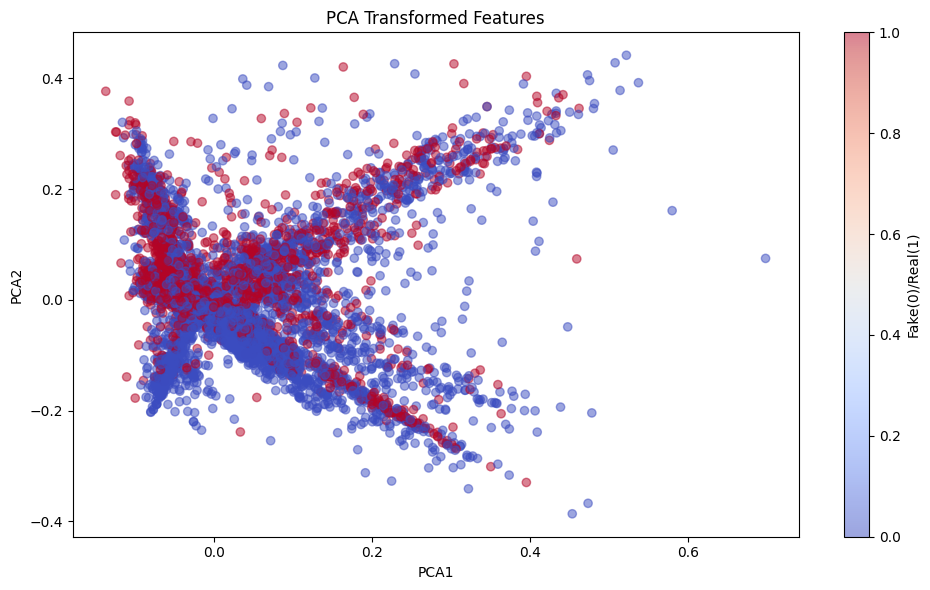

In [7]:
##Dimensionality Reduction using PCA for 2D visualisation
pca= PCA(n_components = 2, random_state= 42)
X_pca = pca.fit_transform(X.toarray()) ##reducing to 2 components for plotting
##plot PCA tranformed features coloured by real or fake labels
plt.figure(figsize= (10,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y, cmap = 'coolwarm', alpha= 0.5)
plt.title('PCA Transformed Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Fake(0)/Real(1)')
plt.tight_layout()
plt.show()

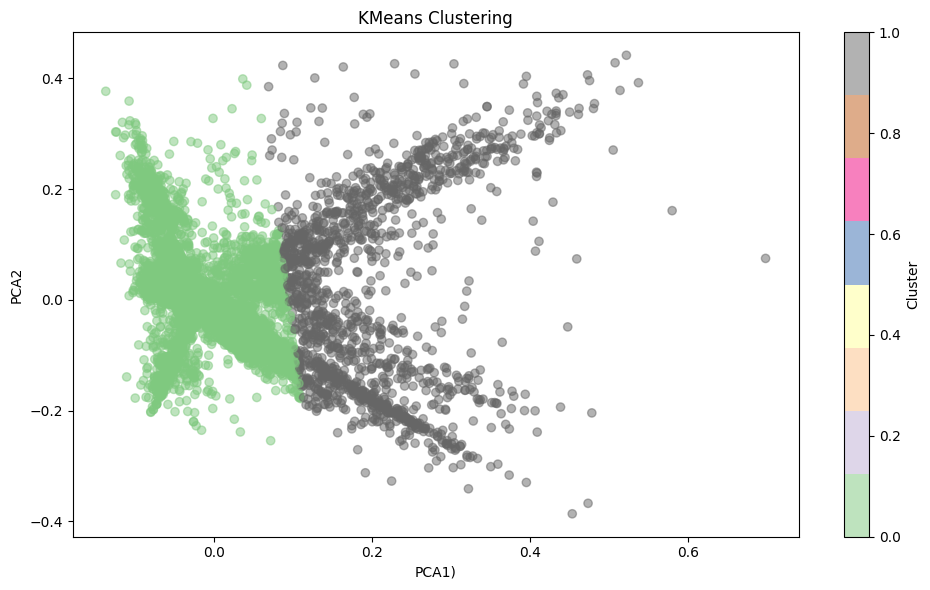

In [13]:
kmeans= KMeans(n_clusters=2, random_state = 50)
kmeans_labels = kmeans.fit_predict(X_pca)
##visualizing clustering result with pca
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap= 'Accent', alpha =0.5)
plt.title('KMeans Clustering')
plt.xlabel('PCA1)')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

DATA SPLITTING

In [16]:
##splitting into training and testing sets
##80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

MODEL IMPLEMENTATION

In [9]:
##SVM model Training and Evaluation
##use GridSearchCV to the find best hyperparameter for SVM
svm_params = {'C': [0.1,1,10,15,100], 'kernel':['linear','rbf']}
svc= SVC(class_weight= 'balanced') ##handling potential imbalance in fake vs real news
grid_svm = GridSearchCV(svc, svm_params, cv=5, scoring='accuracy', n_jobs= -1)
grid_svm.fit(X_train, y_train)
svm_best= grid_svm.best_estimator_ ##best svm model after tuning
y_pred_svm = svm_best.predict(X_test)

##printing SVM evaluation metrics
print('Best SVM Parameters:', grid_svm.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))

Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.6769188894937398
Precision: 0.6519823788546255
Recall: 0.5546533416614616
F1 Score: 0.599392507593655
Confusion Matrix:
 [[1599  474]
 [ 713  888]]


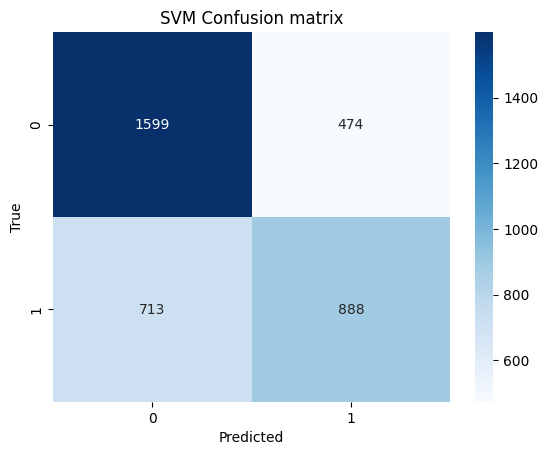

In [10]:
##Confusion Matrix for SVM
conf_svm= confusion_matrix(y_test,y_pred_svm)
sns.heatmap(conf_svm,annot= True, fmt= 'd', cmap= 'Blues')
plt.title('SVM Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
## Logistic Regression model Training and Evaluation
from sklearn.linear_model import LogisticRegression
log_params = {'C': [0.1,1,10,15,100], 'solver': ['liblinear']}
logreg =LogisticRegression(class_weight = 'balanced', max_iter=1000)
grid_log = GridSearchCV(logreg, log_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train, y_train)
log_best = grid_log.best_estimator_ ##best log model after tuning
y_pred_log = log_best.predict(X_test)

##printing LGR evaluation metrics
print('Best logistic regression Parameters:', grid_log.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))
print('F1 Score:', f1_score(y_test, y_pred_log))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_log))

Best logistic regression Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.6731083287969516
Precision: 0.6128668171557562
Recall: 0.6783260462211118
F1 Score: 0.6439371479395197
Confusion Matrix:
 [[1387  686]
 [ 515 1086]]


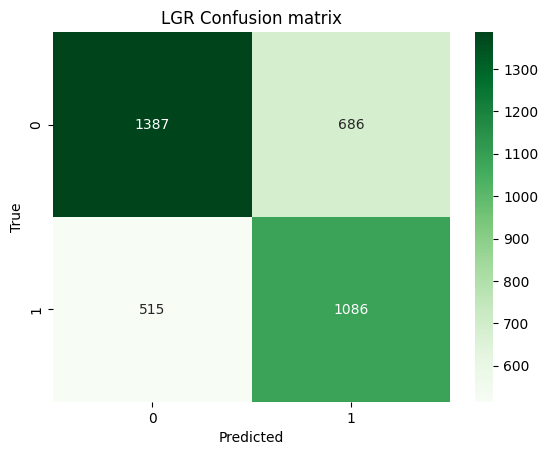

In [12]:
##Confusion Matrix for LGR
conf_log= confusion_matrix(y_test,y_pred_log)
sns.heatmap(conf_log,annot= True, fmt= 'd', cmap= 'Greens')
plt.title('LGR Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
print('\nModel Comparison Summary:')
print(f'SVM Accuracy: {accuracy_score(y_test,y_pred_svm):.4f}, Precision: {precision_score(y_test, y_pred_svm):.4f}, Recall: {recall_score(y_test, y_pred_svm):.4f}, F1:{f1_score(y_test,y_pred_svm):.4f}')
print(f'LogReg Accuracy:{accuracy_score(y_test, y_pred_log):.4f},Precision: {precision_score(y_test, y_pred_log):.4f}, Recall: {recall_score(y_test, y_pred_log):.4f}, F1:{f1_score(y_test,y_pred_log):.4f}')


Model Comparison Summary:
SVM Accuracy: 0.6769, Precision: 0.6520, Recall: 0.5547, F1:0.5994
LogReg Accuracy:0.6731,Precision: 0.6129, Recall: 0.6783, F1:0.6439
